# RETRO VIDEOGAMES DON'T DIE - THEY REINCARNATE
## Bringing back Retro Games to 2019

**December th 2018 <br>
<br>
Principal Investigators: tyd, xxx <br>
E-mails: <br> **


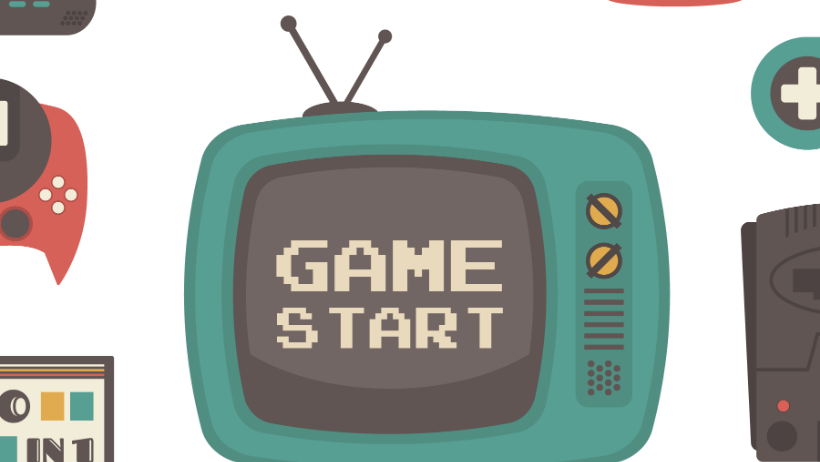

## Introduction

Aim of this project is to find 5 Retro Game titles to reintroduce to the markets of Europe, North America and Japan. 
Our Hypothesis is that we should be able to achieve this through picking top Genres in current age and re-introducing to the current market the top performing retro/old games belonging to those Genres.

Initially, we will evaluate the sales data of some popular Retro Games and Platforms to see how they performed back in the decade of their release in the 20th century.

There will be a step by step investigation to discover 5 video games titles from the 1985 to 1995 to introduce in the markets of each of the three regions - Europe, North America and Japan.

For that we will look into the data from the 2005 onwards and compare best selling genres overall and by each region. 

Then we will explore the most popular games from the 1980s in those genres in North America, Europe and Japan. When the genres are fixed, in each of those regions we will explore the best titles **according to critic score, user score, and platform and Rating. **

We will then use regression to test correlation between sales (independant variable) and genre, critic score, user score and rating to check which is the strongest indicator of popularity of a title over all and in each region. If we see a reasonable correlation between Sales and Genre, we will conclude it was reasonable to pick popular genre in in the 2000s to introduce old games into and our hypothesis was not wrong.

Finally we will choose top 5 titles for each region in order of their popularity under the strongest indicator.

This data will be actually used by a Global Gaming Distribution company to bring back a title to the US & UK market. We will be targeting few developers for the license procurement.

We will be only looking to reintroduce games from before 1995 because we expect to have all binding contracts with publishers for those games to have expired by now. It will make it easier for those games to be acquired and there will be minimal or no royalties to be paid to the publisher.

## Table of Contents

* **1. The Data** <br>
* 1.1 Data Sources *<br>
 ***************
* **2. Data Fetching: Cleaning, and Processing**<br>
* 2.1 Python Libraries<br>
* 2.2 Obtaining Data<br>
* 2.3 Data Cleaning <br>
* 2.4 Merging Data: 1980 Data into Our Dataframe *<br>
***************
* **3. Visualizing: The Video Game Analysis**<br>
* _3.1 Global Trends Analysis<br>_
 * 3.1.1 <br>
 * 3.1.2 <br>
* _3.2 Current: 2005 Onwards<br>_
 * 3.2.1 Popular Genres by Overall and by Region <br>
* _3.3 Retro: 1985 to 1995 <br>_
 * 3.3.1 North Amerca
 * 3.3.2 Europe
 * 3.3.3 Japan
 *******
* **4. Regression**<br>
* **5. Conclusion** <br>
<br>

# 1. The Data

## 1.1 Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
import os

import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

#print(os.environ['PATH'])

## 1.2 Obtaining Data

In [2]:
vgs = pd.read_csv('vgsales1.csv')
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# 2. Data Fetching: Cleaning, and Processing

## 2.1 Data Cleaning

#### Replacing NA values in the Dataset

In [4]:
# Finding all the columns containing NA values
vgs.columns[vgs.isna().any()].tolist()

['Name',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [5]:
# replacing NA values in Year of Release column with the current year 
vgs["Year_of_Release"].fillna(2018, inplace = True) 

# replacing NA values in Genre column with MISC
vgs["Genre"].fillna("Misc", inplace = True)

# replacing NA values in Publisher column with MISC
vgs["Publisher"].fillna("Misc", inplace = True)

#### Changing the column datatypes

In [6]:
#changing the Year of Release Column datatype to Integer
vgs = vgs.astype({ "Year_of_Release": int})

#### Deleting the unnecesary columns

In [7]:
#deleting the column 'Other Sales' from the dataset as we not analyzing other regions apart from Europe, North America and Japan
vgs = vgs.drop(['Other_Sales'], axis=1)

In [8]:
### adding a column & adding the heading
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Visualizing: The Video Game Sales Analysis

## 3.1 Overall Global Trend Analysis

from seaborn import set

set(font_scale=2.0)
plt.figure(figsize=(15,15))
plt.xticks(rotation=40)
sns.set(style='darkgrid')


suptitle("Video Games Genre in order of Sales Count", fontsize=30)
#creating figure
#ordering genre by sales count
ax = sns.countplot(y = 'Genre',
              data = vgs,
              order = vgs['Genre'].value_counts().index)
ax.set_xlabel("Sales Count")


In [9]:
#Top Genre (pie chart)
#Top Titles (Tree Map) done
# Top Developer
# Top Platform
# Over the years, which year has most sold

# Current: Looking At Trends 2005 Onwards

In [10]:
vgs.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E


In [11]:
vgs_2000 = vgs[ vgs["Year_of_Release"] >= 2005]
top_genre_global = vgs_2000.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values(['Global_Sales'], ascending=[False])
top_genre_na = vgs_2000.groupby('Genre').agg({'NA_Sales':np.sum}).sort_values(['NA_Sales'], ascending=[False])
top_genre_eu = vgs_2000.groupby('Genre').agg({'EU_Sales':np.sum}).sort_values(['EU_Sales'], ascending=[False])
top_genre_jp = vgs_2000.groupby('Genre').agg({'JP_Sales':np.sum}).sort_values(['JP_Sales'], ascending=[False])

## Sales Comparison by "Genre" for Each Region

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go


init_notebook_mode(connected=True)

trace = go.Bar(
                x = top_genre_global.index,
                y =top_genre_global['Global_Sales'].tolist(),
                name = 'Video game Genre in order of sales Count',
    marker={'color': top_genre_global['Global_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )


data = [trace]
layout = go.Layout(title='Video game Genre in order of sales Count in Global',
                  xaxis = dict(
                          title = 'Genre',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                            )
                  
                              ),
                   yaxis = dict(
                          title = 'Sales Count',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                        )
                               )                  
                  )

fig = go.Figure(data=data,layout=layout)
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config)

In [13]:
fig = {
  "data": [
    {
      "values": top_genre_na['NA_Sales'].tolist(),
      "labels": top_genre_na.index,
      "domain": {"x": [0, .30],'y': [0, 1]},
      "name": "NA",
      "hoverinfo":"label+percent+name",
      "textinfo":'value', 
      "textposition":"inside",
      "hole": .3,
      "type": "pie"
    },
    {
      "values": top_genre_eu['EU_Sales'].tolist(),
      "labels": top_genre_eu.index,
      "textposition":"inside",
      "domain": {"x": [.36, 0.66],'y': [0, 1]},
      "name": "EU",
      "hoverinfo":"label+percent+name",
        "textinfo":'value',
      "hole": .3,
      "type": "pie"
    },
    {
      "values": top_genre_jp['JP_Sales'].tolist(),
      "labels": top_genre_jp.index,
      "textposition":"inside",
      "domain": {"x": [.70, 1],'y': [0, 1]},
      "name": "JP",
      "hoverinfo":"label+percent+name",
        "textinfo":'value',
      "hole": .3,
      "type": "pie"
    }
  
  
  
  ],
  "layout": {
        "title":"Top Genre in Each Region",'titlefont':{'size' : 30,'color' : '#4292f4'},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "NA",
                "x": 0.13,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "EU",
                "x": 0.51,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "JP",
                "x": 0.87,
                "y": 0.5
            }
        ]
    ,"autosize": True}
}

 

config={'showLink': False}
iplot(fig, filename='donut',config=config)

#iplot(fig,filename='donut group',config=config, image_width=1000, image_height=2000)

In [14]:
labels = top_genre_global['Global_Sales'].index
values = top_genre_global['Global_Sales'].tolist()


trace = go.Pie(labels=labels, values=values,
                hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               textposition= "inside",
               marker=dict(line=dict(color='#000000', width=2)))
config={'showLink': False}
iplot([trace], filename='styled_pie_chart',config=config)

<br>
From the visualization in 1.1 we can derive that overall most popular Genres with regards to Global Sales have been Action, Shooter and Sports categories. <br>

But, the chart above presents a regional picture. It helped us derive which regions contributed to the overall global sales and which did not and provided us insight into what categories would be make sense to introduce in particular markets. <br>

We can see that North America and Europe have Action, Shooter and Sports games as the most popular categories, just as the Global Sales trend, and so it would be rational to introduce games available in those genres in those respective regions. <br>

However we see that Japan belies the global picture. The most popular genre in Japan is Role Playing. Therefore, it would hurt profitability to introduce genres like Sports and Shooter there as their sales are visbily minimal. Actions games, as one can see from the graph, have some popularity in the region and may get some share in the market but their sales impact would not be as strong as of Role Playing Games.<br>

# Top Titles

In [15]:
labels = vgs_2000['Name'].value_counts()[:10].index
values = vgs_2000['Name'].value_counts()[:10].values

In [16]:
vgs.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E


In [17]:
title_na = vgs.sort_values(['NA_Sales'], ascending=[False])[['Name','NA_Sales']][:10]
title_eu = vgs.sort_values(['EU_Sales'], ascending=[False])[['Name','EU_Sales']][:10]
title_jp = vgs.sort_values(['JP_Sales'], ascending=[False])[['Name','JP_Sales']][:10]

In [18]:
from plotly import tools

trace1 = go.Bar(
                x = title_na['Name'].tolist(),
                y = title_na['NA_Sales'].tolist(),
                name = 'NA',
    marker=dict(
        color='rgb(255,100,50)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )

trace2 = go.Bar(
                x = title_eu['Name'].tolist(),
                y = title_eu['EU_Sales'].tolist(),
                name = 'EU',
    marker=dict(
        color='rgb(100,150,200)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
trace3 = go.Bar(
                x = title_jp['Name'].tolist(),
                y = title_jp['JP_Sales'].tolist(),
                name = 'JP',
    marker=dict(
        color='rgb(50,200,50)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
data = [trace1,trace2,trace3]
fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('North America', 'Europe',
                                                          'Japan'), print_grid=False,shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig['layout']['xaxis3'].update(title='Title of the Game',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout']['yaxis2'].update(title='Total Sales',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout'].update(title="TOP 10 TITLE SELL",titlefont={'size' : 30,'color' : '#4292f4'}, height=1200, width=900,margin=go.layout.Margin(
        l=100,
        r=100,
        b=200,
        t=100,
        pad=10
    ))
                     
                     
                     
                     

config={'showLink': False}
iplot(fig,filename='grouped bar',config=config, image_width=800, image_height=700)

# Top Developer

In [19]:
trace = go.Bar(
                x = vgs['Developer'].value_counts()[:10].index,
                y = vgs['Developer'].value_counts()[:10].values,
                name = 'Top Developers',
    marker={'color': vgs['Developer'].value_counts()[:10].values,
        'colorscale': 'Jet'

           }
               )


data = [trace]
layout = go.Layout(title='Top Developers in terms of Game count',
                  xaxis = dict(
                          title = 'Genre',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                            )
                  
                              ),
                   yaxis = dict(
                          title = 'Total Game Developed',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                        )
                               )                  
                  )

fig = go.Figure(data=data,layout=layout)
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config)

# Sold Games in terms of years


In [20]:
vgs.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E


In [21]:
top_sale_global = vgs.groupby('Year_of_Release').agg({'Global_Sales':np.sum}).sort_index()
game_developed = vgs.groupby('Year_of_Release').agg({'Global_Sales':np.sum}).sort_index()

In [22]:
trace1 = go.Scatter(
    x=vgs.groupby('Year_of_Release').agg('count')['Name'].index,
    y=vgs.groupby('Year_of_Release').agg('count')['Name'].values,
    fill='tozeroy',
    name = 'Game Created'
)
trace2 = go.Scatter(
    x=top_sale_global.index,
    y = top_sale_global['Global_Sales'].tolist(),
    fill='tonexty',
    name = 'Game selled',
    yaxis='y2'
)

data = [trace1, trace2]

layout = go.Layout(title='Game created VS Glocal sale per year',
                  xaxis = dict(
                          title = 'Year',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                            )
                  
                              ),
                   yaxis = dict(
                          title = 'Total Sales(In millions)',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                        )
                               ),
                   
                   yaxis2=dict(
                            title='Game Created',
                            titlefont=dict(
                            color='rgb(148, 103, 189)'
                            ),
                            tickfont=dict(
                            color='rgb(148, 103, 189)'
                            ),
                            overlaying='y',
                            side='right'
    ),margin=go.layout.Margin(
        l=100,
        r=100,
        b=50,
        t=100,
        pad=10
    ),legend=dict(orientation="h")
                   
                   
                  )



fig = go.Figure(data=data,layout=layout)
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config)


<br>
From the visualization in 1.1 we can derive that overall most popular Genres with regards to Global Sales have been Action, Shooter and Sports categories. <br>

But, the chart above presents a regional picture. It helped us derive which regions contributed to the overall global sales and which did not and provided us insight into what categories would be make sense to introduce in particular markets. <br>

We can see that North America and Europe have Action, Shooter and Sports games as the most popular categories, just as the Global Sales trend, and so it would be rational to introduce games available in those genres in those respective regions. <br>

However we see that Japan belies the global picture. The most popular genre in Japan is Role Playing. Therefore, it would hurt profitability to introduce genres like Sports and Shooter there as their sales are visbily minimal. Actions games, as one can see from the graph, have some popularity in the region and may get some share in the market but their sales impact would not be as strong as of Role Playing Games.<br>

## 3.3 Looking At Retro Trends: 1985 - 1995

####  Picking Data From The Dataset Dating Only Before 1995

In [23]:
vgs_retro = vgs[ vgs["Year_of_Release"] <= 1995 ]
vgs_retro.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,28.31,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,20.61,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,18.14,NaN,NaN,NaN,NaN,NaN,NaN


* ### 3.3.1 A General Look:

#### Top Retro Games In The Current Popular Genres

In [24]:
#Looking into only the top 3 Genres in our Dataset
global_genres = ['Action', 'Shooter', 'Sports']
vgs_retro = vgs_retro[ vgs_retro["Genre"].isin(global_genres) ]
vgs_retro.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,28.31,NaN,NaN,NaN,NaN,NaN,NaN
124,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,6.51,NaN,NaN,NaN,NaN,NaN,NaN
232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2.42,0.91,1.15,4.61,NaN,NaN,NaN,NaN,NaN,NaN
262,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,4.31,NaN,NaN,NaN,NaN,NaN,NaN
279,Teenage Mutant Ninja Turtles,NES,1989,Action,Palcom,3.38,0.44,0.31,4.17,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Picking the top games with regards to the Global Sales in the Dataset filtered by Genre
top_20_vgs = vgs_retro.nlargest(20, 'Global_Sales')
top_20_vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,28.31,NaN,NaN,NaN,NaN,NaN,NaN
124,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,6.51,NaN,NaN,NaN,NaN,NaN,NaN
232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2.42,0.91,1.15,4.61,NaN,NaN,NaN,NaN,NaN,NaN
262,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,4.31,NaN,NaN,NaN,NaN,NaN,NaN
279,Teenage Mutant Ninja Turtles,NES,1989,Action,Palcom,3.38,0.44,0.31,4.17,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's visualizae the above data using a Tree Map

In [26]:
retro_chart = top_20_vgs.sort_values(['Global_Sales'], ascending=[False])[['Name','Global_Sales']]

In [27]:
trace = go.Bar(
                x = retro_chart.Name.tolist(),
                y =retro_chart['Global_Sales'].tolist(),
                name = 'Top Retro Game',
    marker={'color': top_genre_global['Global_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )


data = [trace]
layout = go.Layout(title='Top Retro Game between 1985 - 1995',
                  xaxis = dict(
                          title = 'Title Name',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                            )
                  
                              ),
                   yaxis = dict(
                          title = 'Sales Count',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                        )
                               ),margin=go.layout.Margin(
        l=100,
        r=50,
        b=200,
        t=100,
        pad=10
    )                  
                  )

fig = go.Figure(data=data,layout=layout)


config={'showLink': False}
iplot(fig,filename='grouped bar',config=config)

From the above Tree Map, we can deduce that over all the most popular Retro titles are: <br>
1. Duck Hunt <br>
2. The Legend of Zelda <br>
3. Asteroids <br>

We can see that those 3 titles have performed very well in terms of Global Sales in the genres of Action, Shooting and Sports. The tree map also shows titles like Frogger, Golf, Tennis, Baseball and Trackmeet, which shows the significance of Sports Games in the retro age. Apart from the top 3 titles, Sports category did take away most of the top video game sales when three of the genres are combined. <br>

It could be safe to bring a bunch of Sports Games from the visualization back in 2019. A good idea could also be to combine the top selling sports games from above into one unit and sell as a 10-in-1 console. This would attract lovers of all different sporting games to one unit, which will help boost sales of the unit as a whole as compared to various individual games and potentially help it acquire a bigger market share - possibly closer to the top three titles as individual pieces. 

<br>

**Let's look at the global market share of the top titles**

* ### 3.3.2 North America

* ### 3.3.3 Europe

* ### 3.3.4 Japan

# 4. Regression

In [28]:
vgs.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E


In [29]:
vgs.shape

(16719, 15)

### Lets Check for outliers

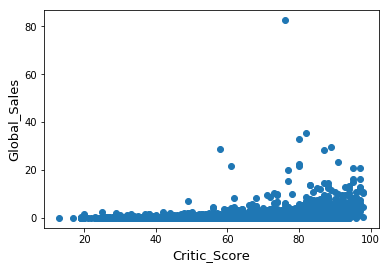

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = vgs['Critic_Score'], y = vgs['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

In [31]:
vgs = vgs.drop(vgs[(vgs['Critic_Score']>60) & (vgs['Global_Sales']>60)].index)

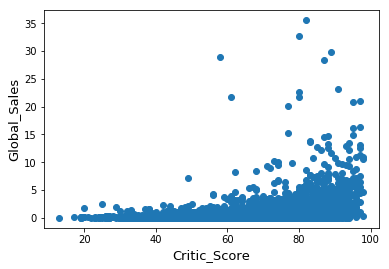

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = vgs['Critic_Score'], y = vgs['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

/home/bat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.




 mu = 0.53 and sigma = 1.41



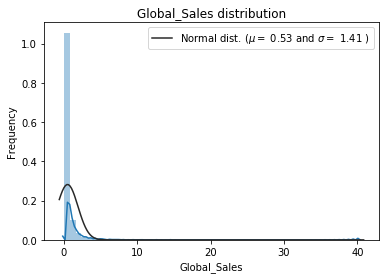

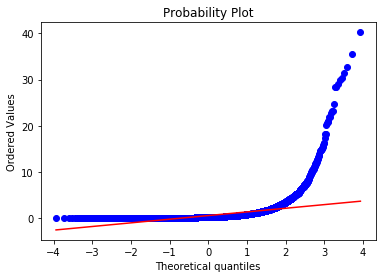

In [33]:
sns.distplot(vgs['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(vgs['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(vgs['Global_Sales'], plot=plt)
plt.show()

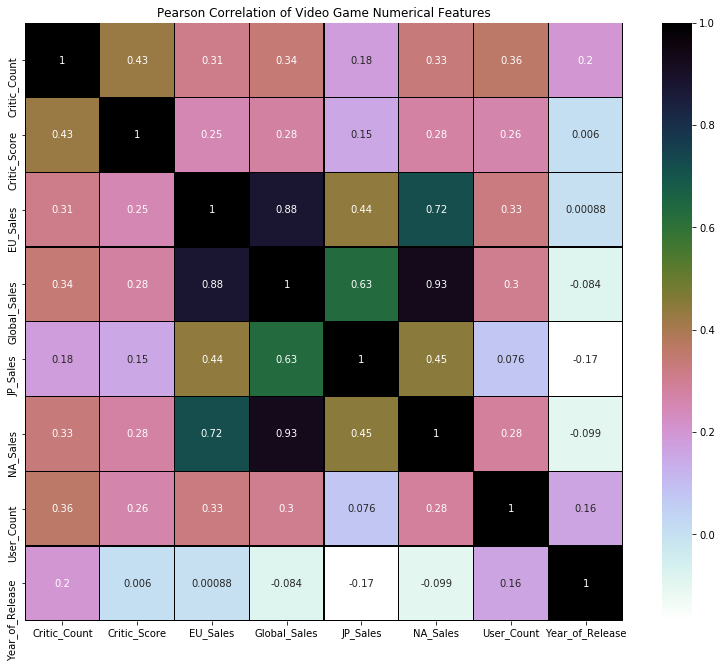

In [34]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in vgs.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = vgs.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = vgs[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [35]:
data = vgs.copy()

In [36]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.605814
Critic_Count,51.333892
Critic_Score,51.333892
Rating,40.489293
User_Score,40.100490
Developer,39.615983
Name,0.011963


In [37]:
print(pd.value_counts(data["Platform"]))

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


In [38]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1319
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5673, 15)


,Missing Ratio
Critic_Count,37.493390
Critic_Score,37.493390
User_Count,34.584876
Rating,23.761678
User_Score,22.563018
Developer,21.716905


In [39]:
data = data.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3546, 15)


,Missing Ratio
User_Count,5.019741
Rating,2.002256
User_Score,0.564016
Developer,0.084602


In [40]:
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())


In [41]:
#There's "tbd" values in the mix here which we need to handle first
data['User_Score'] = data['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

In [42]:
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

In [43]:
#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [44]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head() #Check to verify that dummies are ok

(3546, 15)
(3546, 36)


,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_RP,Rating_T
2,Mario Kart Wii,2008,Nintendo,15.68,12.76,3.79,35.52,82.0,73.0,8.3,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,2009,Nintendo,15.61,10.93,3.28,32.77,80.0,73.0,8,...,0,0,0,1,0,1,0,0,0,0
7,Wii Play,2006,Nintendo,13.96,9.18,2.93,28.92,58.0,41.0,6.6,...,0,0,0,0,0,1,0,0,0,0
8,New Super Mario Bros. Wii,2009,Nintendo,14.44,6.94,4.70,28.32,87.0,80.0,8.4,...,0,0,0,0,0,1,0,0,0,0
13,Wii Fit,2007,Nintendo,8.92,8.03,3.60,22.70,80.0,63.0,7.7,...,0,0,0,1,0,1,0,0,0,0


In [46]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales'], axis=1)

In [47]:
print(data.columns) #easy to copy-paste the values to rearrange from here

X = data[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global_Sales']]

#Double checking the shape
print(X.shape)
print(Y.shape)

Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T'],
      dtype='object')
(3546, 29)
(3546, 1)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2659, 29)
Y_train shape: (2659, 1)
X_test shape: (887, 29)
Y_test shape: (887, 1)


In [49]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)


 mu = 0.43 and sigma = 0.48



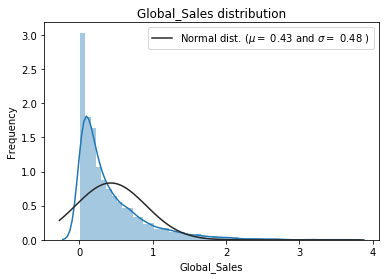

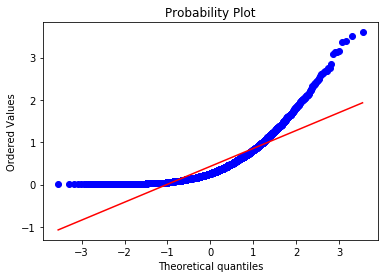

In [50]:
#Check the new distribution 
Y_log_transformed = np.log1p(data['Global_Sales']) #For comparison to earlier, here's the whole Y transformed
sns.distplot(Y_log_transformed , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Y_log_transformed, plot=plt)
plt.show()


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Now we are really close to the fun part. First however, we need to prepare our grids for grid search. For this, we need to decide, which models we will use. So let's try:

* Linear Regression
* Lasso
* Ridge Regression
* Support Vector Regressor
* Random Forest
* Gradient Boosting Regressor
* MLP Regressor a.k.a. a Neural Network

In [53]:
#No grid to define for vanilla linear regression
param_grid_lr = [
    {}
]

#Parameter grid for lasso
param_grid_lasso = [
    {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000000, 100000, 10000, 1000]}
]

#Parameter grid for Ridge Regression
param_grid_rr = [
    {'alpha': [100, 10, 1, 0.1, 0.01, 0.001]}
]

#Parameter grid for Support Vector Regressor
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

#Parameter grid for Random Forest
param_grid_rf = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}
]

#Parameter grid for Gradient Boosting Regressor
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

#Parameter grid for MLPRegressor. 
#Current set of hyperparameters are the result of grid search that took forever.
param_grid_mlpr = [
    {'hidden_layer_sizes': [(10,5)], 'solver': ['lbfgs'], 'batch_size': [200],
     'learning_rate': ['adaptive'], 'max_iter': [800], 'verbose': [True], 
     'nesterovs_momentum': [True], 'early_stopping': [True], 'validation_fraction': [0.12],
     'random_state': [100], 'alpha': [0.1], 'activation': ['logistic']}
]

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

Best parameters: {}
Best cross-validation score: 0.41
Test set score: 0.43


In [55]:
from sklearn.linear_model import Lasso

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
lasso_best_cross_val_score = (np.sqrt(-grid_search_lasso.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lasso_best_cross_val_score)))
lasso_score = np.sqrt(-grid_search_lasso.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lasso_score)))

Best parameters: {'alpha': 0.0001, 'max_iter': 1000000}
Best cross-validation score: 0.41
Test set score: 0.43


In [56]:
from sklearn.linear_model import Ridge

grid_search_rr = GridSearchCV(Ridge(), param_grid_rr, cv=5, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rr.best_params_))
rr_best_cross_val_score = (np.sqrt(-grid_search_rr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rr_best_cross_val_score)))
rr_score = np.sqrt(-grid_search_rr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rr_score)))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.41
Test set score: 0.43


In [57]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best cross-validation score: 0.48
Test set score: 0.50


In [58]:
from sklearn.ensemble import RandomForestRegressor

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rf.best_params_))
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

Best parameters: {'max_depth': 9, 'max_features': 12, 'n_estimators': 30}
Best cross-validation score: 0.34
Test set score: 0.36


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 275}
Best cross-validation score: 0.32
Test set score: 0.33


In [60]:
from sklearn.neural_network import MLPRegressor

grid_search_mlpr = GridSearchCV(MLPRegressor(), param_grid_mlpr, cv=5, scoring='neg_mean_squared_error')
grid_search_mlpr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_mlpr.best_params_))
mlpr_best_cross_val_score = (np.sqrt(-grid_search_mlpr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(mlpr_best_cross_val_score)))
mlpr_score = np.sqrt(-grid_search_mlpr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(mlpr_score)))

Best parameters: {'activation': 'logistic', 'alpha': 0.1, 'batch_size': 200, 'early_stopping': True, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'adaptive', 'max_iter': 800, 'nesterovs_momentum': True, 'random_state': 100, 'solver': 'lbfgs', 'validation_fraction': 0.12, 'verbose': True}
Best cross-validation score: 0.40
Test set score: 0.41


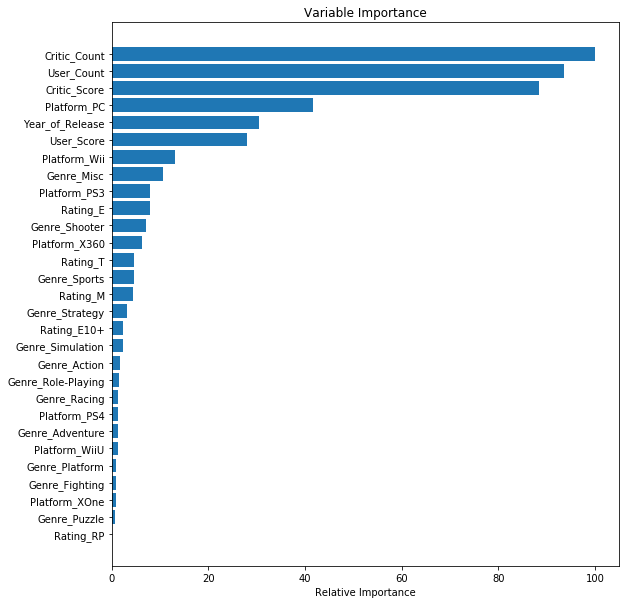

In [61]:
# Plot feature importance
feature_importance = grid_search_gbr.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# 5. Conclusion